In [101]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
# from google.colab.patches import cv2_imshow
# from google.colab import files


Reading the images

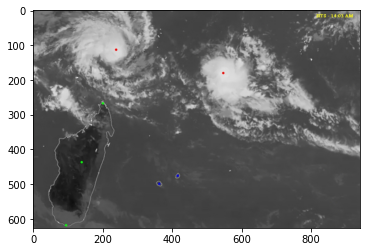

In [102]:
img1=cv2.imread("/Users/ritickgupta/Desktop/EE604-Assign1-pictures/1.jpg")
img2=cv2.imread("/Users/ritickgupta/Desktop/EE604-Assign1-pictures/2.jpg")
img3=cv2.imread("/Users/ritickgupta/Desktop/EE604-Assign1-pictures/3.jpg")


plt.imshow(img1)

# img1[img2[...,2]>235]=[0,0,255]
# img1[img3[...,2]>235]=[0,0,255]

img1=img1[:,:,[2,1,0]]
img2=img2[:,:,[2,1,0]]
img3=img3[:,:,[2,1,0]]

arr1=np.array(img1)
arr2=np.array(img2)
arr3=np.array(img3)


plt.imshow(img1)

Function to determine coordinates of the dot of a particular color

In [103]:
def coord(img,color,init1,init2):
  sumx=0
  sumy=0
  cnt=0
  y=0
  x=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      
      if color==2:
        b=img[i,j,color]>230
      else:
        b=img[i,j,color]>250

      if b:
        sumx+=i
        sumy+=j
        cnt=cnt+1
  if(cnt!=0):
    x=math.floor(sumx/cnt)
    y=math.floor(sumy/cnt)

  return (y+init2,x+init1)


Function to determine distance between two points

In [104]:
def distance(pos1,pos2):
  x1=pos1[0]
  y1=pos1[1]
  x2=pos2[0]
  y2=pos2[1]
  return math.sqrt((x1-x2)**2+(y1-y2)**2)

Tracing dots of red color from all the images to form a new image

(238, 113) (223, 120) (216, 133)
(547, 180) (539, 188) (528, 195)


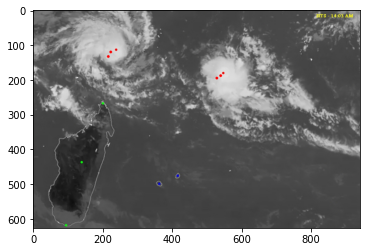

In [105]:
img1r=img1[100:150,200:250]
img2r=img2[100:150,200:250]
img3r=img3[100:150,200:250]

pos1r=coord(img1r,0,100,200)
pos2r=coord(img2r,0,100,200)
pos3r=coord(img3r,0,100,200)

img1r1=img1[150:200,500:600]
img2r1=img2[150:200,500:600]
img3r1=img3[150:200,500:600]

pos1r1=coord(img1r1,0,150,500)
pos2r1=coord(img2r1,0,150,500)
pos3r1=coord(img3r1,0,150,500)

new_img=arr1.copy()
cv2.circle(new_img,pos2r,4,(255,0,0),-1)
cv2.circle(new_img,pos3r,4,(255,0,0),-1)
cv2.circle(new_img,pos2r1,4,(255,0,0),-1)
cv2.circle(new_img,pos3r1,4,(255,0,0),-1)
print(pos1r,pos2r,pos3r)
print(pos1r1,pos2r1,pos3r1)
plt.imshow(new_img)


Coordinates of the islands

In [106]:
i1_1=img1[200:300,150:250]
i1_2=img1[600:625,50:150]
i2_1=img1[450:550,300:400]
i2_2=img1[450:550,400:450]

pos11=coord(i1_1,1,200,150)
pos12=coord(i1_2,1,600,50)
pos21=coord(i2_1,2,450,300)
pos22=coord(i2_2,2,450,400)

print("Coordinates of the extreme green points which are 1500 Km apart:")
print(pos11,pos12)
dist1=distance(pos11,pos12)
print("The distance between the two points is\n",'%.2f'%dist1,"pixels")
r1=1500/dist1
print("Distance per pixel ratio is\n",'%.2f'%r1,"Km/Pixel\n" )

print("Coordinates of the extreme blue points which are 250 Km apart:")
print(pos21,pos22)
dist2=distance(pos21,pos22)
print("The distance between the two points is:\n",'%.2f'%dist2,"pixels")
r2=250/dist2
print("Distance per pixel ratio is:\n",'%.2f'%r2,"Km/Pixel\n")

# (200, 267)
# (94, 617)
# (300, 450)
# (415, 475)


Coordinates of the extreme green points which are 1500 Km apart:
(200, 267) (94, 617)
The distance between the two points is
 365.70 pixels
Distance per pixel ratio is
 4.10 Km/Pixel

Coordinates of the extreme blue points which are 250 Km apart:
(362, 498) (415, 475)
The distance between the two points is:
 57.78 pixels
Distance per pixel ratio is:
 4.33 Km/Pixel



Average Distance per Pixel ratio

In [107]:
scale=(r1+r2)/2
print('%.2f'%scale,"Km/Pixel")

4.21 Km/Pixel


Tracing the intersection point

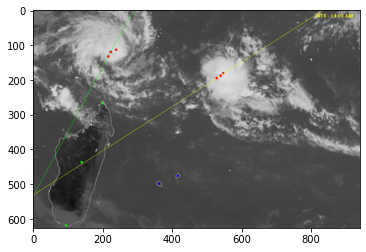

In [108]:
test_img=new_img.copy()
m=(pos3r[1]-pos2r[1])/(pos3r[0]-pos2r[0])
xi=0
yi=-(pos2r[0])*m+pos2r[1]
yi=int(math.floor(yi))
# print(xi,yi)
w=new_img.shape[1]
w1=-(pos3r[0]-w)*m+pos3r[1]
w1=int(math.floor(w1))
# print(w,w1)

cv2.line(test_img,(xi,yi),(w,w1),(0,255,0),1)

mx=(pos3r1[1]-pos2r1[1])/(pos3r1[0]-pos2r1[0])
xix=0
yix=-(pos2r1[0])*mx+pos2r1[1]
yix=int(math.floor(yix))
# print(xix,yix)
wx=new_img.shape[1]
w1x=-(pos3r1[0]-wx)*mx+pos3r1[1]
w1x=int(math.floor(w1x))
# print(wx,w1x)

cv2.line(test_img,(xix,yix),(wx,w1x),(255,255,0),1)

plt.imshow(test_img)

# 0 534
# 940 -1212
# 0 531
# 940 -68

Intersection Point of the two cyclones

In [109]:
#coordinates of the two points of Belna
x1=pos2r[0]
y1=pos2r[1]
x2=pos3r[0]
y2=pos3r[1]
#coordinates of the two points of Ambali
x3=pos2r1[0]
y3=pos2r1[1]
x4=pos3r1[0]
y4=pos3r1[1]

#Calculation of intersection point through line equation
t=((x1-x3)*(y3-y4)-(y1-y3)*(x3-x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
x_i=math.floor(x1+t*(x2-x1))
y_i=math.floor(y1+t*(y2-y1))

intersect_point=(x_i,y_i)
print("The cyclones intersect at",intersect_point)

The cyclones intersect at (2, 529)


In [110]:
#coordinates of the capital city
img_city=img1[400:500,100:200]
position=coord(i1_1,1,400,100)
# plt.imshow(img1)
dist_capital=distance(intersect_point,position)
print("Coordinates of the Capital city are:",position)
print("Distance of capital city from apojuncture is:","%.2f"%(dist_capital*scale),"Km")

Coordinates of the Capital city are: (150, 467)
Distance of capital city from apojuncture is: 676.25 Km


Scaled Distances of intersection point from the cyclones

In [111]:
cdist1=distance(pos3r,intersect_point)
cdist2=distance(pos3r1,intersect_point)

dist1_scaled=cdist1*scale
dist2_scaled=cdist2*scale
print("Belna is",'%.2f'%dist1_scaled,"Km away")
print("Ambali is",'%.2f'%dist2_scaled,"Km away")

Belna is 1897.01 Km away
Ambali is 2625.93 Km away


Speed of the Cyclones

In [112]:
time=55/60 #since it took 55 minutes for the cyclone to reach from second to third position
v1=distance(pos2r,pos3r)*scale/time
v2=distance(pos2r1,pos3r1)*scale/time
print("Speed of Belna is",'%.2f'%v1,"Km/h")
print("Speed of Ambali is",'%.2f'%v2,"Km/h")

Speed of Belna is 67.88 Km/h
Speed of Ambali is 59.94 Km/h


Time taken by the Cyclones to reach the intersection point

In [113]:
t1=dist1_scaled/v1
t2=dist2_scaled/v2
print("Belna takes",'%.2f'%t1,"hrs to reach the intersection point")
print("Ambali takes",'%.2f'%t2,"hrs to reach the intersection point")

if(t1==t2):
  print("Cyclones Collide")
else:
  print("Cyclones Don't Collide")

Belna takes 27.95 hrs to reach the intersection point
Ambali takes 43.81 hrs to reach the intersection point
Cyclones Don't Collide


Since the two Cyclones don't reach the intersection point at the same time, therefore they don't intersect